In [50]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [2]:
#input data 
creditData=pd.read_csv('/Users/Mandy/Study/SpringBoard/Capstone 1/Data/Modified Dataset.csv', header=0)

In [3]:
#subset macro-economic data
limit_bal=creditData.iloc[:,1]
sex=creditData.iloc[:,2]
education=creditData.iloc[:,3]
marriage=creditData.iloc[:,4]
age=creditData.iloc[:,5]
pay_0=creditData.iloc[:,6]
pay_2=creditData.iloc[:,7]
pay_3=creditData.iloc[:,8]
pay_4=creditData.iloc[:,9]
pay_5=creditData.iloc[:,10]
pay_6=creditData.iloc[:,11]
bill_amt1=creditData.iloc[:,12]
bill_amt2=creditData.iloc[:,13]
bill_amt3=creditData.iloc[:,14]
bill_amt4=creditData.iloc[:,15]
bill_amt5=creditData.iloc[:,16]
bill_amt6=creditData.iloc[:,17]
pay_amt1=creditData.iloc[:,18]
pay_amt2=creditData.iloc[:,19]
pay_amt3=creditData.iloc[:,20]
pay_amt4=creditData.iloc[:,21]
pay_amt5=creditData.iloc[:,22]
pay_amt6=creditData.iloc[:,23]
interest_rate=creditData.iloc[:,24]
employed_persons=creditData.iloc[:,25]
cpi=creditData.iloc[:,26]
consumer_confidence=creditData.iloc[:,27]
default_next_month=creditData.iloc[:,28]


In [4]:
# randomly pick the monthly datas to each cells for economic datas

for index,rowValue in interest_rate.iteritems():
        interest_rate[index]=random.choice([1.88,2,2.13])

for index,rowValue in employed_persons.iteritems():
        employed_persons[index]=random.choice([9916,9929,9931,9933,9949,9969])
        
for index,rowValue in cpi.iteritems():
        cpi[index]=random.choice([92.02,92.53,92.82,93.9,94.6,94.73])

for index,rowValue in consumer_confidence.iteritems():
        consumer_confidence[index]=random.choice([73.15,73.06,74.79,73.15,73.38,71.42])


In [5]:
#Data Exploration
default_next_month.value_counts()

0    23364
1     6636
Name: Default_Next_Month, dtype: int64

In [6]:
creditData.groupby('Default_Next_Month').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence
Default_Next_Month,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769,1.668892,9938.020416,92.834746,72.835003
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.667872,9937.652652,92.852622,72.833484


In [7]:
creditData.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,1.668321,9937.980400,92.821921,72.829744,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,1.668894,9937.911937,92.849713,72.837898,0.207763


In [8]:
creditData.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
0,15755.796296,132962.962963,1.740741,2.740741,37.814815,-0.166667,-0.203704,-0.203704,-0.370370,-0.407407,...,2781.944444,4027.944444,2864.222222,2124.518519,2238.388889,1.759259,9934.907407,92.796296,72.962963,0.092593
1,15253.288821,182200.893184,1.620031,1.985138,40.016692,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,...,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,1.666960,9937.929643,92.842302,72.835493,0.234717
2,14807.277813,156413.660737,1.589514,1.729454,31.452706,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,...,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,1.669256,9937.954836,92.834691,72.833814,0.209283
3,13734.154799,98080.495356,1.594427,2.235294,42.798762,0.170279,0.000000,0.024768,-0.024768,-0.142415,...,7865.136223,6150.086687,5121.179567,4563.919505,3408.987616,1.696594,9938.065015,92.891641,72.820433,0.260062


In [9]:
creditData.groupby('Interest_Rate').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
Interest_Rate,,,,,,,,,,,,,,,,,,,,,
1,14900.472535,164659.959759,1.603320,1.850201,1.549598,35.431590,-0.004930,-0.129779,-0.158652,-0.211268,...,5646.845875,5741.568008,5284.831187,4726.353722,4850.934507,5296.488431,9938.077867,92.855231,72.843260,0.221730
2,15050.064955,168883.832502,1.603938,1.854586,1.552991,35.512213,-0.022532,-0.135743,-0.169940,-0.225324,...,5671.872732,6010.155484,5196.372034,4875.491027,4773.845464,5175.372981,9937.870289,92.830508,72.830409,0.220937


In [10]:
creditData.groupby('Employed_Persons').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,CPI,Consumer_Confidence,Default_Next_Month
Employed_Persons,,,,,,,,,,,,,,,,,,,,,
9916,14972.710292,168358.995138,1.601904,1.848460,1.536872,35.566045,0.007293,-0.118720,-0.150932,-0.203606,...,5578.669571,5659.393436,5259.685170,4783.252634,4546.219408,4527.946921,1.673015,92.838736,72.850284,0.225081
9929,15090.879535,167843.785489,1.612382,1.860607,1.566443,35.363565,-0.019125,-0.135252,-0.169361,-0.223778,...,5444.016364,6165.778588,5371.987973,5078.680599,5017.089117,5450.370071,1.674487,92.820781,72.827484,0.222397
9931,15010.665002,167294.446664,1.609269,1.856572,1.549940,35.571714,-0.013384,-0.117459,-0.148222,-0.206952,...,5864.980423,5984.272273,5431.086696,4771.711346,4695.797643,5176.978825,1.669197,92.831802,72.836796,0.223132
9933,14853.768193,165809.484873,1.592600,1.848119,1.561938,35.462388,-0.013287,-0.128577,-0.159240,-0.208504,...,6016.356092,6295.395953,5102.602821,4491.858136,4766.788635,5106.749387,1.663532,92.848324,72.827269,0.222200
9949,15021.693861,167998.019802,1.604950,1.851089,1.542574,35.422970,-0.026535,-0.134059,-0.167327,-0.241188,...,5384.779208,5448.726337,5148.382178,4883.733861,4644.899406,5486.034653,1.667327,92.852871,72.826337,0.222178
9969,15047.816019,167565.424266,1.600912,1.853688,1.553331,35.528747,-0.034496,-0.167922,-0.201427,-0.239096,...,5704.561856,5978.766455,5038.190523,4934.355670,5117.323354,5525.020817,1.664354,92.840008,72.840008,0.212331


In [11]:
creditData.groupby('CPI').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,Consumer_Confidence,Default_Next_Month
CPI,,,,,,,,,,,,,,,,,,,,,
92,14896.100475,168976.349153,1.596894,1.848183,1.553986,35.452507,-0.012651,-0.125243,-0.159850,-0.212598,...,5770.003816,6006.956691,5298.672803,4929.444407,4950.810563,5251.929045,1.673673,9937.857085,72.834326,0.217417
93,15197.002419,166357.589196,1.604717,1.854263,1.544648,35.678089,-0.030639,-0.156219,-0.188470,-0.232816,...,5480.572868,5820.008869,5058.593227,5044.833703,4490.747833,4907.849022,1.671639,9938.067527,72.818383,0.225358
94,15058.398614,165830.891089,1.613366,1.859901,1.552277,35.439703,-0.015842,-0.135347,-0.164653,-0.226634,...,5596.060000,5843.951980,5199.791188,4565.734257,4727.016832,5312.739604,1.659802,9937.997228,72.843168,0.224752


In [12]:
creditData.groupby('Consumer_Confidence').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Default_Next_Month
Consumer_Confidence,,,,,,,,,,,,,,,,,,,,,
71,15021.019408,167542.216887,1.596038,1.857543,1.551220,35.442977,-0.028211,-0.123649,-0.165066,-0.200080,...,5669.212885,6201.276911,4812.765106,5089.407963,4956.172669,5373.007003,1.678071,9937.936375,92.825930,0.221489
73,15009.295552,166800.560954,1.606581,1.853050,1.553842,35.461785,-0.016678,-0.140739,-0.165431,-0.222178,...,5637.358760,5789.573575,5323.134929,4837.983372,4765.985525,5092.049083,1.665882,9937.985626,92.843734,0.221376
74,14945.264098,170137.744241,1.600079,1.849087,1.544678,35.621724,-0.005361,-0.116164,-0.170373,-0.235107,...,5761.950755,6164.872319,5249.112986,4517.527601,4776.213463,5548.637014,1.670373,9937.757149,92.831414,0.220214


In [19]:
creditData['x_bin']=pd.cut(x=creditData.AGE, bins=[20,30,40,50,60,70]) 

Text(0,0.5,'Frequency')

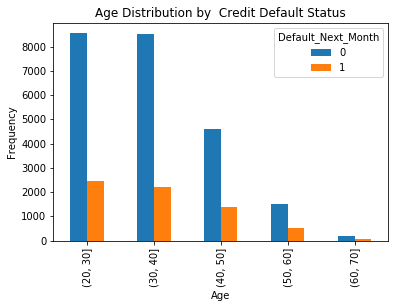

In [14]:
%matplotlib inline
#bar chart of age grouped by default
pd.crosstab(creditData.x_bin,default_next_month).plot(kind='bar')
plt.title('Age Distribution by  Credit Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [20]:
#Separate the dataset into dependent and independent variables
X=creditData.drop('Default_Next_Month',axis=1)
X=X.drop('ID',axis=1)
X=X.drop('x_bin',axis=1) 
y=creditData['Default_Next_Month']

#then seperate it into training set, validation set and test set
X_train,X_val_test,y_train,y_val_test = train_test_split(X,y, test_size=0.3)
X_val,X_test,y_val,y_test=train_test_split(X_val_test,y_val_test,test_size=0.5) 


In [21]:
#######MODEL ONE: LOGISTIC REGRESSION MODEL######
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
#If the evaluation score suggests not overfitting, predict the default status for each sample in test set
LR_evaluated=LR_classifier.score(X_val,y_val)
print("The accuracy of Logistic Regression Model on validation set is :",LR_evaluated)
if LR_evaluated >0.97:
    print (" The Logistic Regression Model is overfitting in this case.")
else:
    LR_predicted=LR_classifier.predict(X_test)
    #generate default probabilities based on test set
    LR_probs_default=np.sum(LR_predicted)/len(LR_predicted)
    print("The Default Probability based on Logistic Regression Model is : ", LR_probs_default)
    LR_accuracy=LR_classifier.score(X_test,y_test)
    print("The accuracy of Logistic Regression Model on test set is : ",LR_accuracy)
    print(metrics.confusion_matrix(y_test,LR_predicted))
    print (metrics.classification_report(y_test,LR_predicted))
    #10-fold cross-validation 
    LR_cross_val_scores = cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
    print("The 10 fold cross validation score based on Logistic Regression Model is: ",LR_cross_val_scores.mean())

The accuracy of Logistic Regression Model on validation set is : 0.780444444444
The Default Probability based on Logistic Regression Model is :  0.000222222222222
The accuracy of Logistic Regression Model on test set is :  0.777333333333
[[3498    1]
 [1001    0]]
             precision    recall  f1-score   support

          0       0.78      1.00      0.87      3499
          1       0.00      0.00      0.00      1001

avg / total       0.60      0.78      0.68      4500

The 10 fold cross validation score based on Logistic Regression Model is:  0.778700013663
Mean Absolute Error: 0.222666666667


In [51]:
######MODEL TWO: DECISION TREE MODEL#####
DT_classifier = DecisionTreeRegressor()
DT_classifier.fit(X_train,y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [83]:
#If the evaluation score suggests not overfitting, predict the default status for each sample in test set
DT_evaluated_diff=DT_classifier.predict(X_val)-y_val
DT_evaluated_count=pd.value_counts(DT_evaluated_diff)
DT_evaluated= DT_evaluated_count[0]/len(DT_evaluated_diff) 
print("The accuracy of Decision Tree Model on validation set is :",DT_evaluated)
if DT_evaluated >0.97:
    print (" The Decision Tree Model is overfitting in this case.")
else:
    DT_predicted=DT_classifier.predict(X_test)
    #generate default probabilities based on test set
    DT_probs_default=np.sum(DT_predicted)/len(DT_predicted)
    print("The Default Probability based on Decision Tree Model is : ", DT_probs_default)
    DT_test_diff=DT_predicted-y_test
    DT_test_count=pd.value_counts(DT_test_diff)
    DT_accuracy= DT_test_count[0]/len(DT_test_diff) 
    print("The accuracy of Decision Tree Model on test set is : ",DT_accuracy)
    print(metrics.confusion_matrix(y_test,DT_predicted))
    print (metrics.classification_report(y_test,DT_predicted))
    #10-fold cross-validation 
    DT_cross_val_scores = cross_val_score(DecisionTreeRegressor(),X,y,scoring='accuracy',cv=10)
    print("The 10 fold cross validation score based on Decision Tress Model is: ",DT_cross_val_scores.mean())

The accuracy of Decision Tree Model on validation set is : 0.718444444444
The Default Probability based on Decision Tree Model is :  0.243777777778
The accuracy of Decision Tree Model on test set is :  0.723111111111
[[2828  671]
 [ 575  426]]
             precision    recall  f1-score   support

          0       0.83      0.81      0.82      3499
          1       0.39      0.43      0.41      1001

avg / total       0.73      0.72      0.73      4500

The 10 fold cross validation score based on Decision Tress Model is:  0.725166666667


0.718444444444
